## Milestone Report

***

This report is to present summaries of the three datasets downloaded and plans for modeling.

### Import Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

import nltk



pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

### Load Data

In [2]:
blogs = pd.read_csv('en_US.blogs.txt', sep="\t", header=None, names=["words"])

In [3]:
news = pd.read_csv('en_US.news.txt', sep="\t", header=None, names=["words"])

In [4]:
twitter = pd.read_csv('en_US.twitter.txt', sep="\t", header=None, names=["words"])

In [5]:
blogs.head()

,words
0,"In the years thereafter, most of the Oil fields and platforms were named after pagan “gods”."
1,We love you Mr. Brown.
2,"Chad has been awesome with the kids and holding down the fort while I work later than usual! The kids have been busy together playing Skylander on the XBox together, after Kyan cashed in his $$$ from his piggy bank. He wanted that game so bad and used his gift card from his birthday he has been saving and the money to get it (he never taps into that thing either, that is how we know he wanted it so bad). We made him count all of his money to make sure that he had enough! It was very cute to watch his reaction when he realized he did! He also does a very good job of letting Lola feel like she is playing too, by letting her switch out the characters! She loves it almost as much as him."
3,"so anyways, i am going to share some home decor inspiration that i have been storing in my folder on the puter. i have all these amazing images stored away ready to come to life when we get our home."
4,"With graduation season right around the corner, Nancy has whipped up a fun set to help you out with not only your graduation cards and gifts, but any occasion that brings on a change in one's life. I stamped the images in Memento Tuxedo Black and cut them out with circle Nestabilities. I embossed the kraft and red cardstock with TE's new Stars Impressions Plate, which is double sided and gives you 2 fantastic patterns. You can see how to use the Impressions Plates in this tutorial Taylor created. Just one pass through your die cut machine using the Embossing Pad Kit is all you need to do - super easy!"


In [6]:
news.head()

,words
0,"He wasn't home alone, apparently."
1,The St. Louis plant had to close. It would die of old age. Workers had been making cars there since the onset of mass automotive production in the 1920s.
2,"WSU's plans quickly became a hot topic on local online sites. Though most people applauded plans for the new biomedical center, many deplored the potential loss of the building."
3,"The Alaimo Group of Mount Holly was up for a contract last fall to evaluate and suggest improvements to Trenton Water Works. But campaign finance records released this week show the two employees donated a total of $4,500 to the political action committee (PAC) Partners for Progress in early June. Partners for Progress reported it gave more than $10,000 in both direct and in-kind contributions to Mayor Tony Mack in the two weeks leading up to his victory in the mayoral runoff election June 15."
4,"And when it's often difficult to predict a law's impact, legislators should think twice before carrying any bill. Is it absolutely necessary? Is it an issue serious enough to merit their attention? Will it definitely not make the situation worse?"


In [7]:
twitter.head()

,words
0,"How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way, way too long."
1,When you meet someone special... you'll know. Your heart will beat more rapidly and you'll smile for no reason.
2,they've decided its more fun if I don't.
3,So Tired D; Played Lazer Tag & Ran A LOT D; Ughh Going To Sleep Like In 5 Minutes ;)
4,Words from a complete stranger! Made my birthday even better :)


### File Size Calculations

In [8]:
blogsize = os.stat("en_US.blogs.txt")
blogsize

os.stat_result(st_mode=33206, st_ino=29836347531331694, st_dev=2363605595, st_nlink=1, st_uid=0, st_gid=0, st_size=210160014, st_atime=1615876130, st_mtime=1615616015, st_ctime=1405995186)

In [9]:
blogsize.st_size / (1024*1024)

200.42420768737793

In [10]:
newsize = os.stat("en_US.news.txt")
newsize

os.stat_result(st_mode=33206, st_ino=8444249301324124, st_dev=2363605595, st_nlink=1, st_uid=0, st_gid=0, st_size=205811889, st_atime=1615876133, st_mtime=1615616018, st_ctime=1405995184)

In [11]:
newsize.st_size / (1024*1024)

196.277512550354

In [12]:
tweetsize = os.stat("en_US.twitter.txt")
tweetsize

os.stat_result(st_mode=33206, st_ino=6755399441060189, st_dev=2363605595, st_nlink=1, st_uid=0, st_gid=0, st_size=167105338, st_atime=1615876137, st_mtime=1615616021, st_ctime=1405995178)

In [13]:
tweetsize.st_size / (1024*1024)

159.36406898498535

### Calculate Lines

In [14]:
fname = input("Enter file name: ")
num_lines = 0
with open(fname, 'r', encoding="utf8") as f:
    for line in f:
        num_lines += 1
print("Number of lines:")
print(num_lines)

Enter file name: en_US.blogs.txt
Number of lines:
899288


In [15]:
fname = input("Enter file name: ")
num_lines = 0
with open(fname, 'r', encoding="utf8") as f:
    for line in f:
        num_lines += 1
print("Number of lines:")
print(num_lines)

Enter file name: en_US.news.txt
Number of lines:
1010242


In [16]:
fname = input("Enter file name: ")
num_lines = 0
with open(fname, 'r', encoding="utf8") as f:
    for line in f:
        num_lines += 1
print("Number of lines:")
print(num_lines)

Enter file name: en_US.twitter.txt
Number of lines:
2360148


### Longest line seen in the three en_US data sets

In [17]:
# Characters count
blogs["words"].apply(lambda x: len(x)).sort_values()

640860        1
561033        1
563482        1
480059        1
600573        1
          ...  
192046    25249
213823    27954
484083    35153
505862    37191
472858    40833
Name: words, Length: 878612, dtype: int64

In [20]:
top10longestblog = blogs["words"].apply(lambda x: len(x)).nlargest(10)
top10longestblog

472858    40833
505862    37191
484083    35153
213823    27954
192046    25249
525510    24387
765074    21027
447848    20661
336443    20062
678958    19795
Name: words, dtype: int64

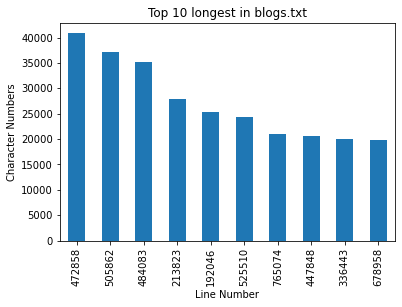

In [26]:
top10longestblog.plot.bar(title="Top 10 longest in blogs.txt")
plt.xlabel("Line Number")
plt.ylabel("Character Numbers")
plt.show()

In [27]:
# Characters count
news["words"].apply(lambda x: len(x)).sort_values()

847672        1
736352        1
618625        1
918227        1
154135        1
          ...  
434679     6450
536027     7160
298031     7859
511265     8949
122404    11384
Name: words, Length: 1000105, dtype: int64

In [29]:
top10longestnews = news["words"].apply(lambda x: len(x)).nlargest(10)
top10longestnews

122404    11384
511265     8949
298031     7859
536027     7160
434679     6450
605818     6035
14451      5760
171484     5437
92150      5412
201901     5236
Name: words, dtype: int64

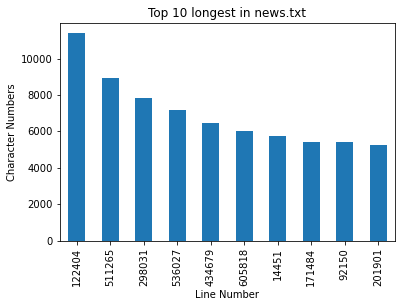

In [30]:
top10longestnews.plot.bar(title="Top 10 longest in news.txt")
plt.xlabel("Line Number")
plt.ylabel("Character Numbers")
plt.show()

In [28]:
# Characters count
twitter["words"].apply(lambda x: len(x)).sort_values()

230723        2
43187         2
939048        3
2105830       3
441974        3
           ... 
1864026    6999
2166455    7091
1511139    7096
641346     7307
2085840    9732
Name: words, Length: 2342733, dtype: int64

In [31]:
top10longesttwitter = twitter["words"].apply(lambda x: len(x)).nlargest(10)
top10longesttwitter

2085840    9732
641346     7307
1511139    7096
2166455    7091
1864026    6999
478999     6945
720127     6650
753792     6155
1451729    6121
1683520    5792
Name: words, dtype: int64

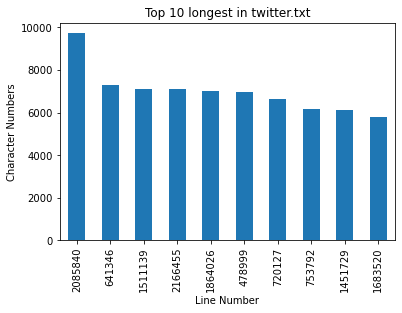

In [33]:
top10longesttwitter.plot.bar(title="Top 10 longest in twitter.txt")
plt.xlabel("Line Number")
plt.ylabel("Character Numbers")
plt.show()

### Word Counts

In [36]:
blogs['words'].apply(lambda x: len(str(x).split()))

0          16
1           5
2         140
3          40
4         111
         ... 
878607     23
878608     22
878609     62
878610     12
878611     43
Name: words, Length: 878612, dtype: int64

In [37]:
blogs['words'].apply(lambda x: len(str(x).split())).nlargest(10)

472858    6630
484083    6247
505862    6170
213823    5021
192046    4537
525510    4373
765074    3831
447848    3724
336443    3553
354500    3548
Name: words, dtype: int64

In [39]:
news['words'].apply(lambda x: len(str(x).split()))

0           5
1          29
2          29
3          85
4          40
           ..
1000100    45
1000101    33
1000102    54
1000103    69
1000104    29
Name: words, Length: 1000105, dtype: int64

In [40]:
news['words'].apply(lambda x: len(str(x).split())).nlargest(10)

122404    1792
511265    1370
298031    1309
536027    1208
434679    1091
14451     1031
605818     988
171484     899
201901     898
92150      883
Name: words, dtype: int64

In [41]:
twitter['words'].apply(lambda x: len(str(x).split()))

0          24
1          19
2           8
3          20
4          11
           ..
2342728    12
2342729    21
2342730     2
2342731     4
2342732    20
Name: words, Length: 2342733, dtype: int64

In [42]:
twitter['words'].apply(lambda x: len(str(x).split())).nlargest(10)

2085840    1812
641346     1320
1864026    1298
2166455    1292
1511139    1290
478999     1267
720127     1212
753792     1133
1451729    1116
1683520    1074
Name: words, dtype: int64

***

### Summary Table

| File Name      | File Size (MB) | Line Count | Word Count Highest
|----------------|-------------   |------------|-------------------
|en_US.blogs.txt |  200           | 899288     | 6630
|en_US.news.txt  |	196           | 1010242    | 1792
|en_US.twitter.txt | 159          | 2360148    | 1812

***

### Modeling Tasks

I will be using a subset of 10000 lines from one file to do the modeling. The text will need to be processed such as tokenization, lemmanization, etc. An N-gram model will be developed and tested for results.

The model will be trained, tested and uploaded as web application.

***